# Featured Activity 3: Convert and Transform Raw Data

Loading required libraries :

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Reading CSV to data frame :

In [2]:
pew <- read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

<h6> Topic 1: Statewise internet usage </h6>

1) Extracting State and eminuse columns from table and converting to tbl. <br>
2) Removing entries where eminuse is (8,9,NA) (Since 8, 9 are options for don't know and refused to answer') <br>
3) Aggregating data where it gives total count for each combination in table.

In [3]:
df <- data.frame(State=pew$state, Internet_Usage=pew$eminuse)
dftbl <- tbl_df(df)
dftbl <- dftbl[!dftbl$Internet_Usage %in% c(8,9, NA),]
result <- aggregate(dftbl, by = list(dftbl$State, dftbl$Internet_Usage), FUN = length)

<b>Question : Which state has the highest number of Internet/E-mail users?</b><br>
<b>Hypothesis : Indiana(IN) has the highest number of Internet/E-mail users.<br>(Numbers in graph represent State numbers.)</b>

Plotting graph using ggplot:

Group.1,Group.2,State,Internet_Usage
1,1,33,33
2,1,8,8
4,1,27,27
5,1,13,13
6,1,166,166
8,1,27,27
9,1,18,18
10,1,5,5
11,1,6,6
12,1,102,102


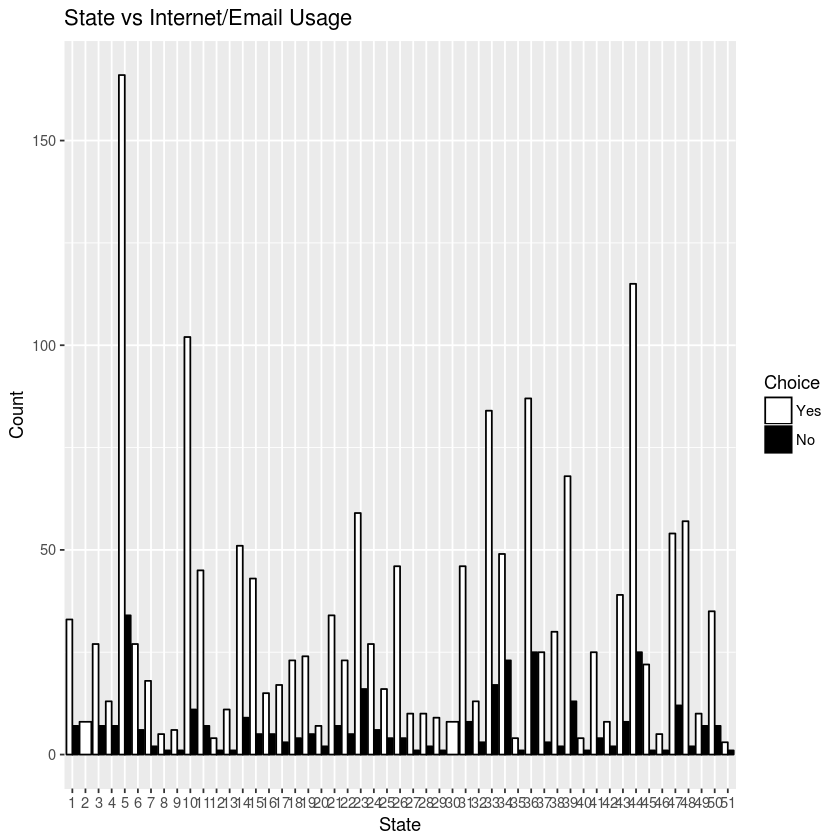

In [4]:
result
result <- within(result, States <- factor(Group.1, labels = c("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51")))
result <- within(result, Choice <- factor(Group.2, labels = c("Yes", "No")))
ggplot(data=result, aes(x=States, y=State, fill=Choice)) + 
geom_bar(stat="identity", position=position_dodge(), colour="black") + 
labs(title ="State vs Internet/Email Usage", x = "State", y = "Count") +
scale_fill_manual(values = c("White", "Black"))

The graph above shows the plotting between the states and number of people who use Internet/E-mail in each state. <br>
Black represents No and White represents Yes. <br>
One can observe that State No. 5 has the highest number of "Yes".<br>
State No. 5 is Indiana. Therefore our Hypothesis is right.

<h6> Topic 2: Sex wise Dating App usage </h6>

1) Extracting sex and date1a columns from table and converting to tbl. <br>
2) Removing entries where date1a is (8,9,NA) (Since 8, 9 are options for don't know and refused to answer') <br>
3) Aggregating data where it gives total count for each combination in table.

In [5]:
df2 <- data.frame(Sex=pew$sex, Dating=pew$date1a)
df2tbl <- tbl_df(df2)
df2tbl <- df2tbl[!df2tbl$Dating %in% c(8,9, NA),]
result2 <- aggregate(df2tbl, by = list(df2tbl$Sex, df2tbl$Dating), FUN = length)
result2 <- within(result2, rm(Dating))
result2

Group.1,Group.2,Sex
1,1,125
2,1,100
1,2,736
2,2,777


<b>Question : Do Males or Females use the dating app more?</b><br>
<b>Hypothesis : Relatively Males have used Dating Application more than Females</b>

Plotting graph using ggplot:

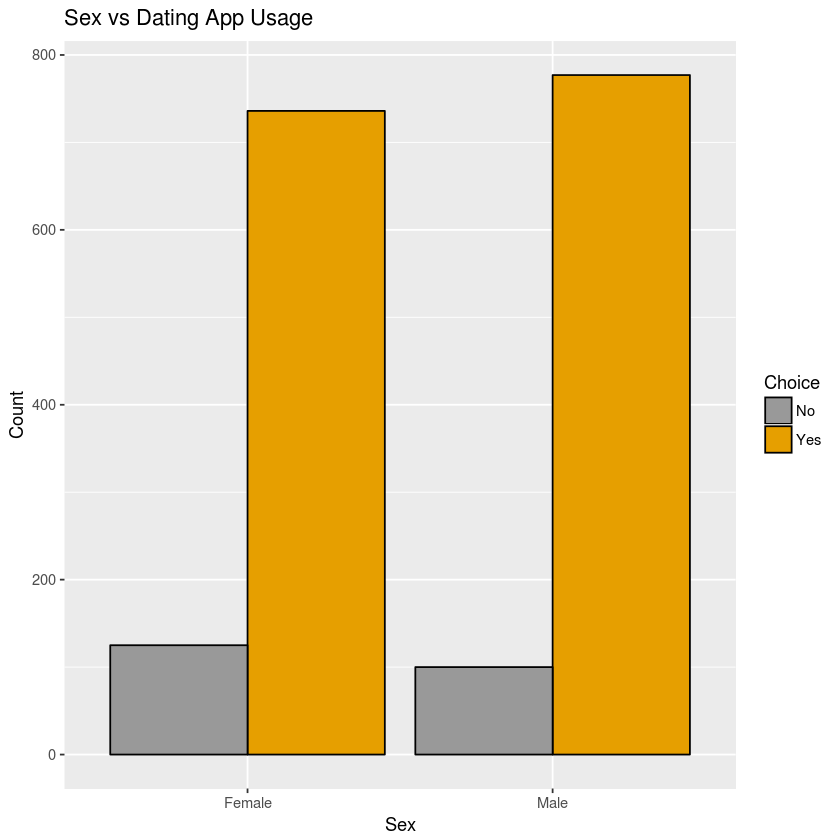

In [6]:
result2 <- within(result2, Group.1 <- factor(Group.1, labels = c("Female", "Male")))
result2 <- within(result2, Choice <- factor(Group.2, labels = c("No", "Yes")))
ggplot(data=result2, aes(x=Group.1, y=Sex, fill=Choice)) + 
geom_bar(stat="identity", position=position_dodge(), colour="black") +
labs(title ="Sex vs Dating App Usage", x = "Sex", y="Count")+
scale_fill_manual(values = c("#999999", "#E69F00"))

The above graph shows the plot between Sex and the count of Dating App users. <br>
Grey represents "No" and yellow represents "Yes". <br>
We can observe that Males have a higher Yellow column than Females.<br>
Therefore our hypothesis is right that men use the dating app more than women do.<br>
Another observation is that more number of Females answered No than Males. Which further strengthens our hypothesis.

<h6>Topic 3: Agewise Game Play</h6>

1) Extracting Age and game1 columns from table and converting to tbl. <br>
2) Removing entries where date1a is (8,9,NA) (Since 8, 9 are options for don't know and refused to answer') <br>
3) Aggregating data where it gives total count for each combination in table.

In [7]:
df3 <- data.frame(Age=pew$age, Game=pew$game1)
df3tbl <- tbl_df(df3)
df3tbl <- df3tbl[!df3tbl$Game %in% c(8,9, NA),]
result3 <- aggregate(df3tbl, by = list(df3tbl$Age, df3tbl$Game), FUN = length)

<b>Question : Which age group has the highest number of people playing games?</b><br>
<b>Hypothesis : Highest number of game players are aged around 25 to 27</b>

Plotting graph using ggplot:

Group.1,Group.2,Age,Game,Choice
18,1,16,16,Yes
19,1,20,20,Yes
20,1,18,18,Yes
21,1,15,15,Yes
22,1,24,24,Yes
23,1,19,19,Yes
24,1,21,21,Yes
25,1,20,20,Yes
26,1,27,27,Yes
27,1,9,9,Yes


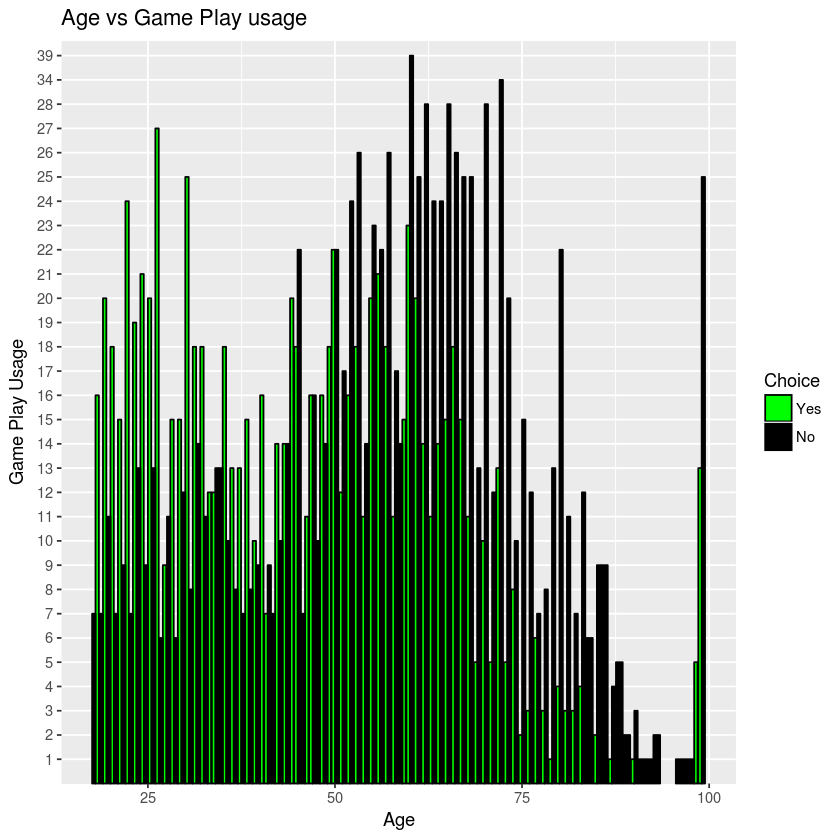

In [8]:
result3 <- within(result3, Age <- factor(Age), Group.1 <- factor(Group.1))
result3 <- within(result3, Choice <- factor(Group.2, labels = c("Yes", "No")))
result3
ggplot(data=result3, aes(x=Group.1, y=Age, fill=Choice)) + 
geom_bar(stat="identity", position=position_dodge(), colour="black") +labs(title ="Age vs Game Play usage", x = "Age", y = "Game Play Usage")+
scale_fill_manual(values = c("Green", "Black"))

The above graph is a plot between Age and people who play Games.<br>
Green represents Yes and Black represents No.<br>
We can observe that the green columns are higher in the range of 22-27.<br>
Therefore our hypothesis is right that people aged aroung 25-27 relatively play more games than others.

<h6>Topic 4 : Party Wise Ditribution</h6>

1) Extracting party columns from table and converting to tbl. <br>
2) Removing entries where date1a is (8,9,NA) (Since 8, 9 are options for don't know and refused to answer') <br>
3) Group data by party and summarise where it gives total count for number of times a party appears in a particular group.

In [9]:
df4 <- data.frame(Party = pew$party)
df4tbl <- tbl_df(df4)
df4tbl <- df4tbl[!df4tbl$Party %in% c(8,9, NA),]
df4tbl <- summarise(group_by(df4tbl, Party), Count=length(Party))

<b>Question : Which party has the highest number of supporters?</b><br>
<b>Hypothesis : Most of the people are Independent Party supporters</b>

Plotting graph using ggplot:

Party,Count
Republican,443
Democratic,617
Independent,686
None,144
Other,14


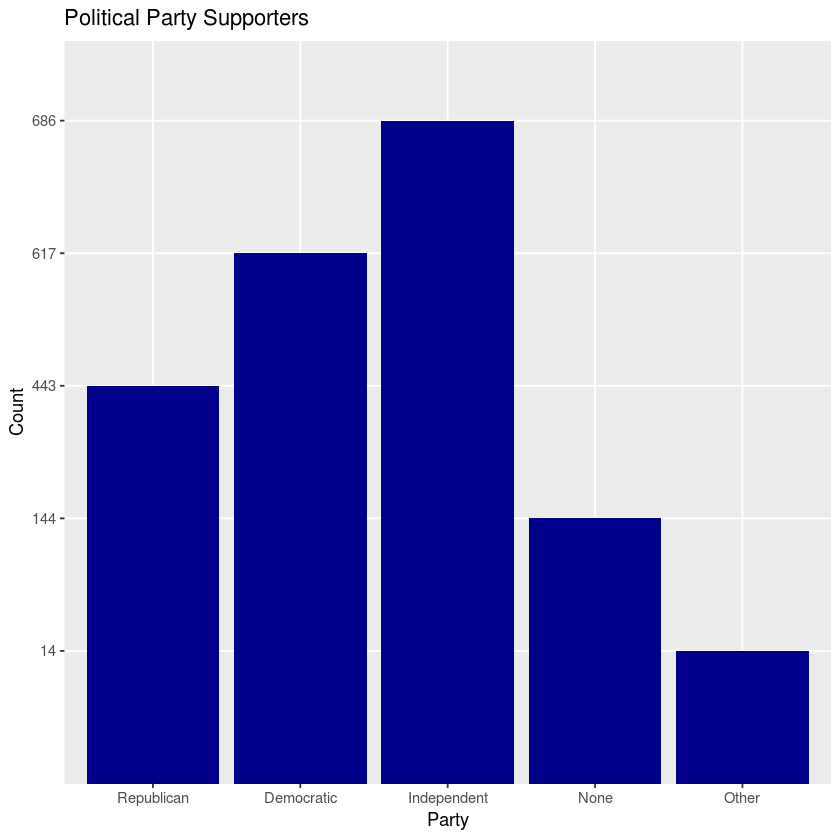

In [10]:
df4tbl <- within(df4tbl, Count <- factor(Count))
df4tbl <- within(df4tbl, Party <- factor(Party, labels = c("Republican","Democratic","Independent","None", "Other")))
df4tbl
ggplot(data=df4tbl, aes(x=Party, y=Count)) + geom_bar(stat="identity", fill="Dark blue") + labs(title ="Political Party Supporters") 

The above graph is a plot for the the number of people who support diffrent polititcal parties. <br>
We can observe that Independent party has the highest count.<br>
Therefore our hypothesis is right that people support Independent party more than any other political party.

<h6>Topic 5 : Highest level of education recieved</h6>

1) Extracting education columns from table and converting to tbl. <br>
2) Removing entries where date1a is (8,9,NA) (Since 8, 9 are options for don't know and refused to answer') <br>
3) Group data by education value and summarise where it gives total count for number of times a value appears in a particular group.

In [11]:
df5 <- data.frame(Education=pew$educ2)
df5tbl <- tbl_df(df5)
df5tbl <- df5tbl[!df5tbl$Education %in% c(98,99, NA),]
df5tbl <- summarise(group_by(df5tbl, Education), Count=length(Education))
df5tbl<-data.frame(df5tbl)

<b>Question: What is the variation of the highest level of education completed by people?</b><br>
<b>Hypothesis : Most of the people have completed High School Eductaion.</b>

Plotting graph using ggplot:

Education,Count
<HS,66
HS Inc,86
HS Grad,483
Coll ongoing,340
Assoc. deg,183
Bach deg,410
PG ongoing,36
PG,377


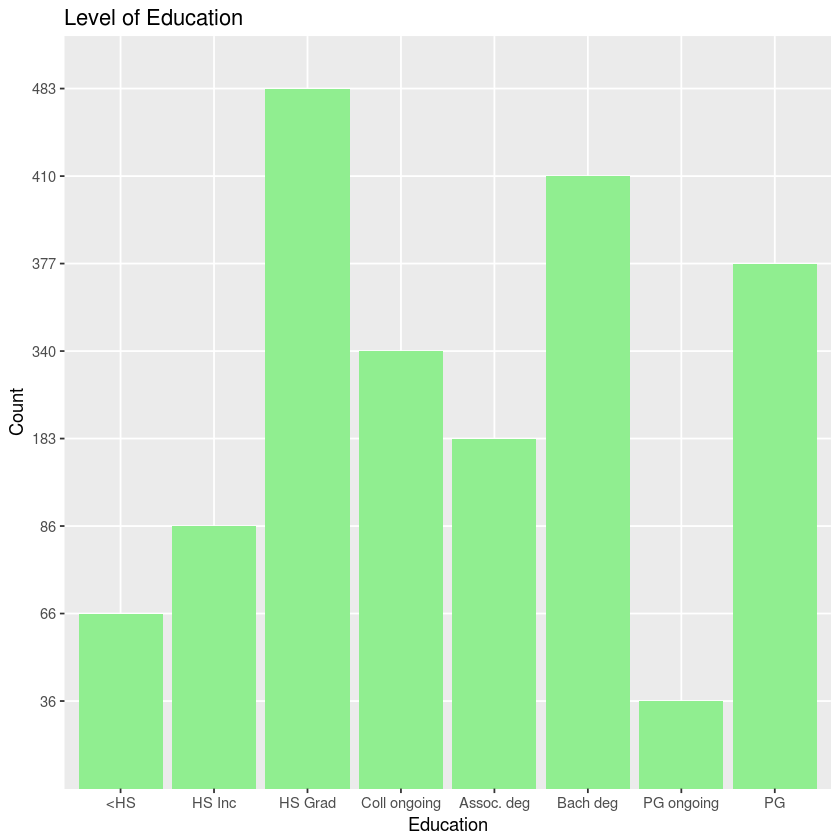

In [12]:
df5tbl <- within(df5tbl, Count <- factor(Count))
df5tbl <- within( df5tbl, Education <- factor(Education,labels = c("<HS","HS Inc","HS Grad","Coll ongoing","Assoc. deg", "Bach deg","PG ongoing","PG")))
df5tbl
ggplot(data=df5tbl, aes(x=Education, y=Count)) + geom_bar(stat="identity", fill="light green") + labs(title ="Level of Education")

The above graph is a plot for the highest level of education completed by people.<br>
The graph shows that people who have completed High school education are mre than any other kind of education.<br>
Therefore our hypothesis is right that most of the people have completed their high school education. 